# MIS 637 - Final Project (Group 3) - Decision Tree

In [1]:
################################
# Import the libraries
################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz as gv
#pip install pydotplus
import pydotplus
from IPython.display import Image
import seaborn as sns
# from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
# Loan_ID					Unique Loan ID
# Gender					Male/ Female
# Married					Applicant married (Y/N)
# Dependents				Number of dependents
# Education					Applicant Education (Graduate/ Under Graduate)
# Self_Employed				Self employed (Y/N)
# ApplicantIncome			Applicant income
# CoapplicantIncome			Coapplicant income
# LoanAmount				Loan amount in thousands
# Loan_Amount_Term			Term of loan in months
# Credit_History			(1- has all debts paid, 0- not paid)
# Property_Area				Urban/ Semi Urban/ Rural
# Loan_Status				(Target) Loan approved (Y/N)

In [2]:
# Load the data
main_loan_df = pd.read_csv("Loan_Data.csv")
train_df = main_loan_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

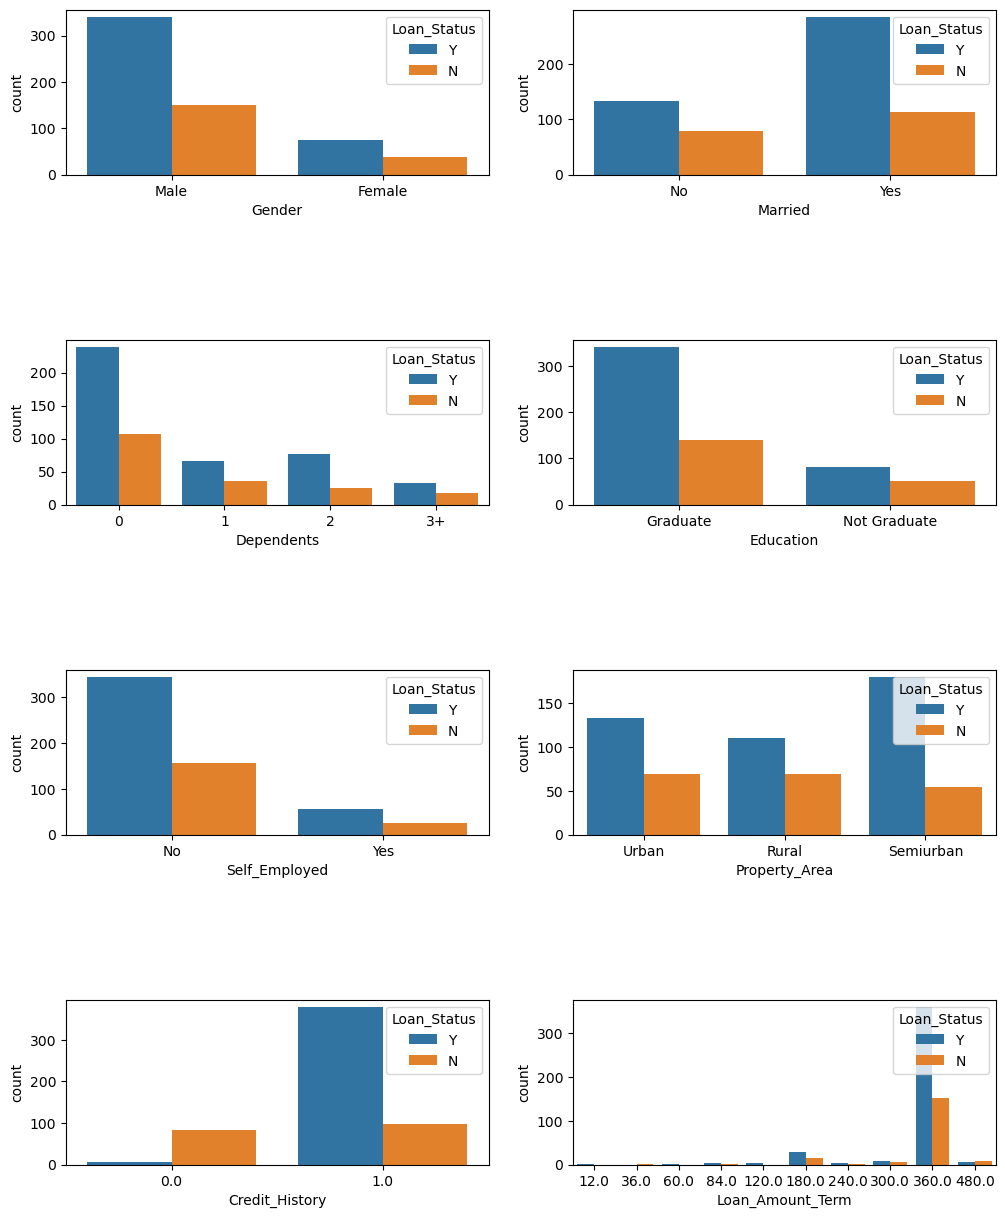

In [4]:
# Create a 4x2 grid of subplots for visualizing categorical columns with respect to the target variable (Loan_Status)
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Loop through each categorical column and create a countplot with hue as Loan_Status
for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x = cat_col, data = train_df, hue = 'Loan_Status', ax = axes[row, col])

# Adjust the spacing between subplots for better readability
plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


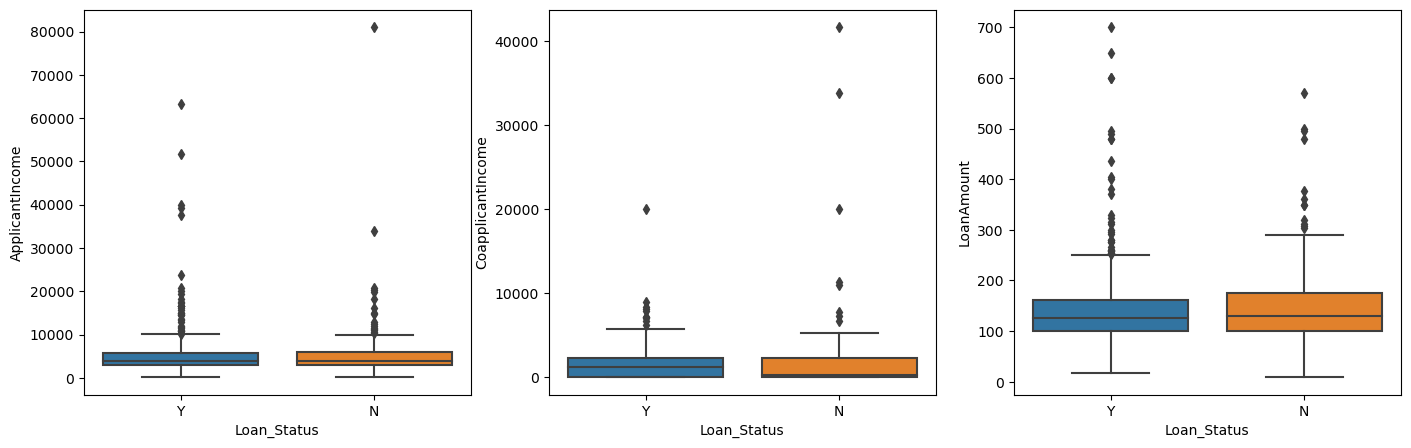

In [5]:
# Create a 1x3 grid of subplots for visualizing numerical columns with respect to the target variable (Loan_Status)
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Loop through each numerical column and create a boxplot with x-axis as Loan_Status
for idx, cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=train_df, x='Loan_Status', ax=axes[idx])

# Print descriptive statistics for the numerical columns
print(train_df[numerical_columns].describe())

# Adjust the spacing between subplots for better readability
plt.subplots_adjust(hspace=1)

In [6]:
# Convert proper_area into binary of semiurban or not as as a new variable
positive = ['Semiurban']
negative = ['Rural', 'Urban']
train_df["Semiurban"] = train_df["Property_Area"].isin(positive).astype(int)

# Dropping the unnecessary columns
train_df = train_df.drop(columns=['Loan_ID'], axis=1) 
train_df = train_df.drop(columns=['Gender'], axis=1) 
train_df = train_df.drop(columns=['Self_Employed'], axis=1) 
train_df = train_df.drop(columns=['Dependents'], axis=1) 
train_df = train_df.drop(columns=['Property_Area'], axis=1) 

# Drop the null values
train_df = train_df.dropna()

In [7]:
# Preparing the data for the decision tree algorithm: Split features and target variable
# Store all features except Loan_Status in variable X
X = train_df.drop("Loan_Status", axis=1)
# Store the target variable Loan_Status in variable y
y = train_df['Loan_Status']

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into 60% training and 40% testing sets, stratifying on the target variable, and using a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [10]:
# Create a DecisionTreeClassifier instance
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree on the training data
tree_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 'Y')
recall = recall_score (y_test, y_pred, pos_label = 'Y')
f1 = f1_score (y_test, y_pred,pos_label = 'Y')

model_score = tree_clf.score(X_train, y_train)

print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1: {f1}")
print(f"model_score: {model_score}")

              precision    recall  f1-score   support

           N       0.54      0.60      0.57        65
           Y       0.81      0.77      0.79       146

    accuracy                           0.72       211
   macro avg       0.68      0.69      0.68       211
weighted avg       0.73      0.72      0.72       211

Accuracy: 0.7203791469194313
Precision: 0.8129496402877698
Recall: 0.773972602739726
f1: 0.7929824561403509
model_score: 1.0


------------------------------------
Depth : 1
Accuracy: 0.8388625592417062
Precision: 0.8181818181818182
Recall: 0.9863013698630136
f1: 0.8944099378881987
model_score: 0.7974683544303798
------------------------------------
Depth : 2
Accuracy: 0.8341232227488151
Precision: 0.8135593220338984
Recall: 0.9863013698630136
f1: 0.891640866873065
model_score: 0.8006329113924051
------------------------------------
Depth : 3
Accuracy: 0.8246445497630331
Precision: 0.8114285714285714
Recall: 0.9726027397260274
f1: 0.8847352024922118
model_score: 0.8069620253164557
------------------------------------
Depth : 4
Accuracy: 0.7962085308056872
Precision: 0.8238993710691824
Recall: 0.8972602739726028
f1: 0.859016393442623
model_score: 0.8259493670886076
------------------------------------
Depth : 5
Accuracy: 0.8056872037914692
Precision: 0.8181818181818182
Recall: 0.9246575342465754
f1: 0.8681672025723473
model_score: 0.8544303797468354
------------------------------------
Depth : 6
Accuracy: 0.796

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

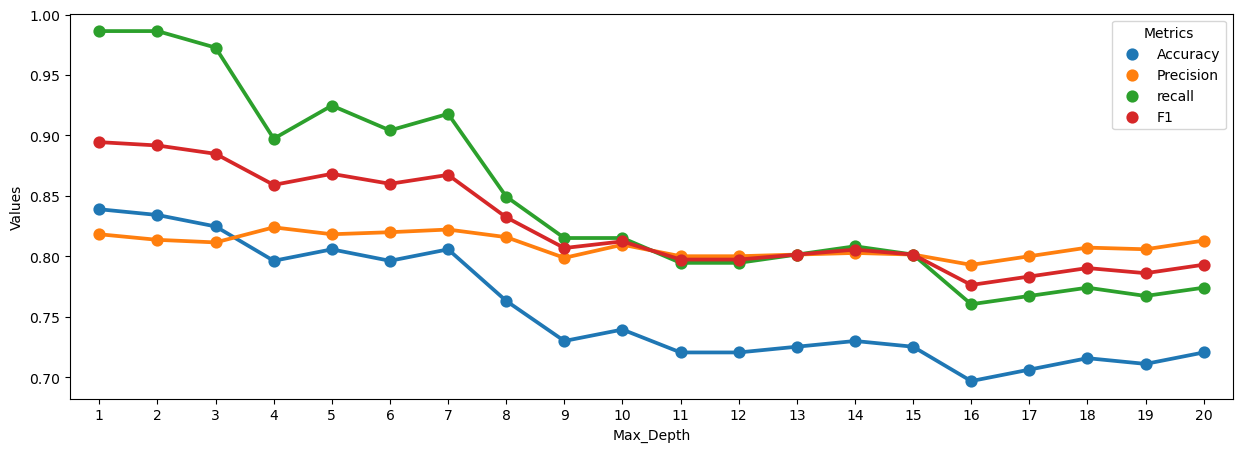

In [12]:
# Initialize lists to store training and validation accuracy, F1 scores, and tree depths
accuracy_list = []
precision_list = []
recall_list = []
fl_list = []
tree_depths = []

# Train and evaluate decision tree models with different max_depth values from 1 to 20
for depth in range(1, 21):
    # Prune the decision tree by setting a maximum depth
    pruned_clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    pruned_clf.fit(X_train, y_train)

    # Generate the graph visualization of the pruned decision tree
    dot_data_pruned = tree.export_graphviz(pruned_clf, feature_names=X.columns.tolist())
    graph_pruned = gv.Source(dot_data_pruned)
    # gv.Source(graph_pruned).view() # to see the graph


    # Evaluate the pruned decision tree on the test set
    y_pred_pruned = pruned_clf.predict(X_test)
    accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
    precision_pruned = precision_score(y_test, y_pred_pruned, pos_label = 'Y')
    recall_pruned = recall_score (y_test, y_pred_pruned, pos_label = 'Y')
    f1_pruned = f1_score (y_test, y_pred_pruned,pos_label = 'Y')
    
    accuracy_list.append(accuracy_pruned)
    precision_list.append(precision_pruned)
    recall_list.append(recall_pruned)
    fl_list.append(f1_pruned)
    tree_depths.append(depth)

    print("------------------------------------")
    print(f"Depth : {depth}")
    print(f"Accuracy: {accuracy_pruned}")
    print(f"Precision: {precision_pruned}")
    print(f"Recall: {recall_pruned}")
    print(f"f1: {f1_pruned}")

# print(classification_report(y_test, y_pred_pruned))

    model_score_pruned = pruned_clf.score(X_train, y_train)
    print(f"model_score: {model_score_pruned}")

# Store the collected metrics and max_depth values in a dictionary and convert it to a DataFrame
Tuning_Max_depth = {"Accuracy": accuracy_list, "Precision": precision_list, "recall": recall_list, "F1": fl_list, "Max_Depth": tree_depths}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Melt the DataFrame for easy plotting with seaborn
plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")

# Plot the metrics against max_depth to visualize the impact of max_depth on model performance
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)


In [13]:
#############################
# Training on depth 3
#############################

pruned_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
pruned_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_pruned = pruned_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_pruned)
precision = precision_score(y_test, y_pred_pruned, pos_label = 'Y')
recall = recall_score (y_test, y_pred_pruned, pos_label = 'Y')
f1 = f1_score (y_test, y_pred_pruned,pos_label = 'Y')

# Generate the graph visualization of the pruned decision tree
dot_data_pruned = tree.export_graphviz(pruned_clf, feature_names=X.columns.tolist())
graph_pruned = gv.Source(dot_data_pruned)
gv.Source(graph_pruned).view() # to see the graph

# Accuracy
accuracy = accuracy_score(y_test, y_pred_pruned)
precision = precision_score(y_test, y_pred_pruned, pos_label = 'Y')
recall = recall_score (y_test, y_pred_pruned, pos_label = 'Y')
f1 = f1_score (y_test, y_pred_pruned,pos_label = 'Y')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1: {f1}")

print(classification_report(y_test, y_pred_pruned))

model_score = pruned_clf.score(X_train, y_train)
print(f"model_score: {model_score}")

Accuracy: 0.8246445497630331
Precision: 0.8114285714285714
Recall: 0.9726027397260274
f1: 0.8847352024922118
              precision    recall  f1-score   support

           N       0.89      0.49      0.63        65
           Y       0.81      0.97      0.88       146

    accuracy                           0.82       211
   macro avg       0.85      0.73      0.76       211
weighted avg       0.84      0.82      0.81       211

model_score: 0.8069620253164557
